In [1]:
from neuralnet.neuralnet import *

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split

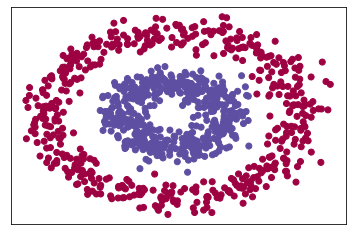

In [6]:
# Create Artificial Dataset
X, Y = make_circles(1000, noise=0.1, factor=0.4, shuffle=True)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Spectral")
plt.xticks([])
plt.yticks([])
plt.show()

# Split on test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=10)

In [12]:
%matplotlib inline
nn = NeuralNet(
    layer_shapes=(
        (2, 100),
        (100, 100),
        (100, 1),
    ),
    visual_mode=False
)

nn.optimize(Xtrain, Ytrain, epochs=4000, batch_size=64, learning_rate=6e-2, show_after=200)


Epoch 0 | Error: -0.004141548 | WV0: -8.672e-06 | WV1: 8.273e-06
Epoch 200 | Error: -0.000396039 | WV0: 0.000127004 | WV1: -3.957e-06
Epoch 400 | Error: 0.032304802 | WV0: 0.000102554 | WV1: -0.001292754
Epoch 600 | Error: 0.022854816 | WV0: -0.000439162 | WV1: -0.001447342
Epoch 800 | Error: 0.000665391 | WV0: 0.000161135 | WV1: -0.000103877
Epoch 1000 | Error: -0.000101075 | WV0: 0.000155075 | WV1: -1.9861e-05
Epoch 1200 | Error: 0.000163547 | WV0: 6.7461e-05 | WV1: -3.1881e-05
Epoch 1400 | Error: 4.301e-05 | WV0: 8.5868e-05 | WV1: -1.6581e-05
Epoch 1600 | Error: -4.6342e-05 | WV0: 8.4959e-05 | WV1: -5.563e-06
Epoch 1800 | Error: -3.8079e-05 | WV0: 6.9312e-05 | WV1: -4.222e-06
Epoch 2000 | Error: -3.9651e-05 | WV0: 5.246e-05 | WV1: -2.84e-06
Epoch 2200 | Error: 0.000145444 | WV0: 7.154e-06 | WV1: -1.8355e-05
Epoch 2400 | Error: 0.000245171 | WV0: 2.6095e-05 | WV1: -2.7466e-05
Epoch 2600 | Error: -0.000146365 | WV0: 6.1045e-05 | WV1: 9.356e-06
Epoch 2800 | Error: -8.0128e-05 | WV0: 4.

In [13]:
train_forwards = nn.forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

forwards = nn.forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Training Set: 100.0%
Precission on Test set: 100.0%


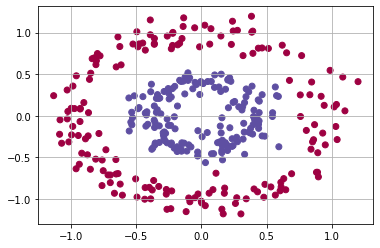

In [14]:
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=np.around(forwards[-1]), cmap="Spectral")
plt.grid(True)
plt.show()